In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D,\
                                    Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.utils import plot_model
import math

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(validation_split=.1, rescale=1./255)

In [ ]:
with tf.Session() as sess:
  devices = sess.list_devices()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\098uy\anaconda3\envs\neural_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-0dd9ecd7b9ec>", line 1, in <module>
    with tf.Session() as sess:
NameError: name 'tf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\098uy\anaconda3\envs\neural_gpu\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\098uy\anaconda3\envs\neural_gpu\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\U

In [3]:
train_generator = datagen.flow_from_directory('../mfcc_specs/',
                                              target_size=(216,144),
                                              batch_size=64,
                                              color_mode='grayscale',
                                              shuffle=True,
                                              interpolation='lanczos',
                                              subset='training')

validation_generator = datagen.flow_from_directory('../mfcc_specs/',
                                                  target_size=(216,144),
                                                  color_mode='grayscale',
                                                  shuffle=True,
                                                  interpolation='lanczos',
                                                  subset='validation')

Found 7198 images belonging to 8 classes.
Found 796 images belonging to 8 classes.


In [6]:
train_generator.class_indices

{'Electronic': 0,
 'Experimental': 1,
 'Folk': 2,
 'Hip-Hop': 3,
 'Instrumental': 4,
 'International': 5,
 'Pop': 6,
 'Rock': 7}

In [11]:
model = Sequential()

model.add(Input(shape=(216,144,1), name = 'img_input'))

model.add(Conv2D(32,
                 activation='relu',
                 kernel_size=(3,3),
                 name='conv_1'))
model.add(MaxPooling2D(name='pool_1'))


model.add(Conv2D(64,
                 activation='relu',
                 kernel_size=(3,3),
                 name='conv_2'))
model.add(MaxPooling2D(name='pool_2'))


# model.add(Conv2D(128,
#                  activation='relu',
#                  kernel_size=(3,3)))
# model.add(MaxPooling2D())


model.add(Flatten(name='flat_1'))




# model.add(Dense(32,
#                 activation='relu',
#                 input_shape=(X_train[0].shape),
#                 kernel_regularizer=l2(.00001)))
# model.summary()

# model.add(Dropout(.1))

model.add(Dense(64,
                activation='relu',
                kernel_regularizer=l2(),
                name='interpretation'))
# model.summary()

# model.add(Flatten())
# model.summary()

model.add(Dense(8,
                activation='softmax',
                name='output'))

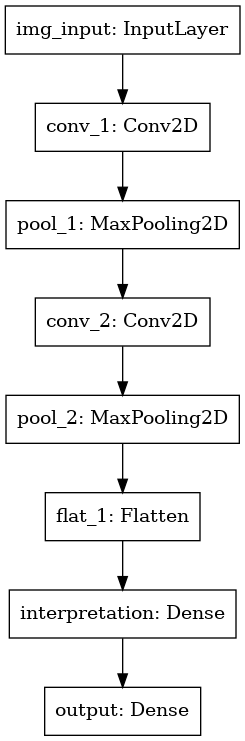

In [12]:
plot_model(model, to_file='../images/conv2d_sequential.png')

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [14]:
results = model.fit(train_generator,
                    steps_per_epoch = 112,
                    epochs=10,
                    validation_data = validation_generator,
                    validation_steps=12,
                    verbose = 1)

Epoch 1/10
112/112 [==============================] - 55s 490ms/step - loss: 2.7736 - accuracy: 0.1504 - val_loss: 2.0001 - val_accuracy: 0.2578
Epoch 2/10
112/112 [==============================] - 57s 508ms/step - loss: 2.0080 - accuracy: 0.2304 - val_loss: 1.8373 - val_accuracy: 0.3047
Epoch 3/10
112/112 [==============================] - 58s 513ms/step - loss: 1.9064 - accuracy: 0.2759 - val_loss: 1.8642 - val_accuracy: 0.2786
Epoch 4/10
112/112 [==============================] - 59s 523ms/step - loss: 1.8715 - accuracy: 0.2875 - val_loss: 1.8399 - val_accuracy: 0.3021
Epoch 5/10
112/112 [==============================] - 57s 509ms/step - loss: 1.8619 - accuracy: 0.3006 - val_loss: 1.7372 - val_accuracy: 0.3542
Epoch 6/10
112/112 [==============================] - 57s 508ms/step - loss: 1.8469 - accuracy: 0.3091 - val_loss: 1.8249 - val_accuracy: 0.2943
Epoch 7/10
112/112 [==============================] - 57s 507ms/step - loss: 1.8442 - accuracy: 0.3099 - val_loss: 1.7922 - val_ac

35,37

In [9]:
preds = model.predict(validation_generator)

In [20]:
model.evaluate(validation_generator)

13/13 [==============================] - 4s 271ms/step - loss: 2.4253 - accuracy: 0.3065


[2.4252705574035645, 0.3065326511859894]

In [19]:
preds[:10]

array([[0.10477554, 0.1392022 , 0.0746507 , 0.08296563, 0.04473116,
        0.15502377, 0.2205271 , 0.17812397],
       [0.05231972, 0.13438451, 0.07149927, 0.18172036, 0.0467974 ,
        0.39336294, 0.06827576, 0.05164004],
       [0.0068673 , 0.1269801 , 0.3407054 , 0.0078323 , 0.12462358,
        0.32300916, 0.05219458, 0.01778756],
       [0.12937067, 0.119345  , 0.03139967, 0.01992351, 0.12556367,
        0.02637611, 0.13807325, 0.40994805],
       [0.23834538, 0.11263402, 0.02178209, 0.18499991, 0.0709701 ,
        0.26214266, 0.0951543 , 0.01397156],
       [0.13972238, 0.24874128, 0.0807453 , 0.04985839, 0.09569968,
        0.08382621, 0.2157813 , 0.08562543],
       [0.03563951, 0.1484186 , 0.16054627, 0.03870412, 0.09031805,
        0.34909457, 0.11080602, 0.06647284],
       [0.08462797, 0.10257515, 0.10348429, 0.08109422, 0.05686495,
        0.2775028 , 0.14516778, 0.14868288],
       [0.21274917, 0.10242035, 0.03332598, 0.21621822, 0.03174904,
        0.15365183, 0.178081

In [25]:
math.ceil(train_generator.samples//64)

112

In [24]:
train_generator.samples//64

112

In [26]:
math.ceil(validation_generator.samples//64)

12